In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor



Fish market dataset is a collection of different fish species and their characteristics like weight, length, height, width. Dataset includes the following speces : "Perch," "Bream," "Roach," "Pike," "Smelt," "Parkki," and "Whitefish". My goal is to check differnt models that predict weight based on different factors.

In [ ]:
fish_df = pd.read_csv('Fish.csv')
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:

X = fish_df.Length3.values.reshape(-1,1)
y = fish_df.Weight.values.reshape(-1)

model = LinearRegression()
model.fit(X,y)

LinearRegression()

-490.4005915891796
[28.4601708]
0.8520094124796922


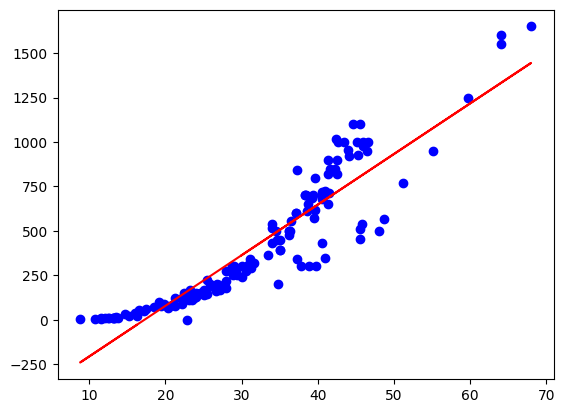

In [ ]:
o=model.intercept_
print(o)#the intercept value (-490) indicates that when the fish length is 0 cm it's weight is -490 grmas. Which
#may lead to invalid weight prediction when length is low.
m=model.coef_
print(m)#this parameter shows that there is possitive correlation between fish Length and it's Weight. With every
# 1 cm weight increases by 28,46 grams
score = model.score(X,y) #the evaluation score is 0,852 which suggests that this model is a great fit
#to the data
print(score)
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
#The destribution of blue dots on the plot suggests that the correlation has a nonlinear pattern, even though
#evaluation score is high, that indictaes that polynomial regression might provide a better fit to the data.

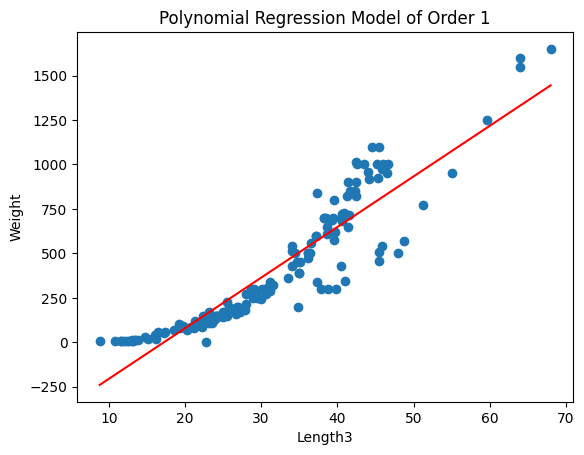

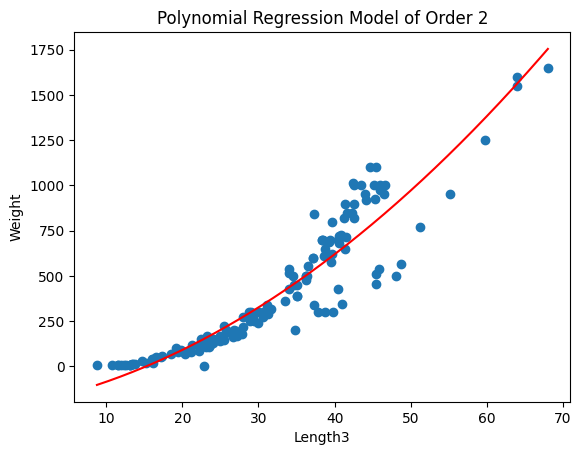

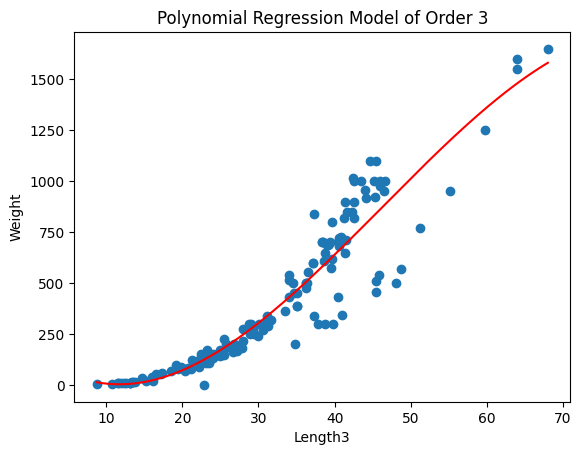

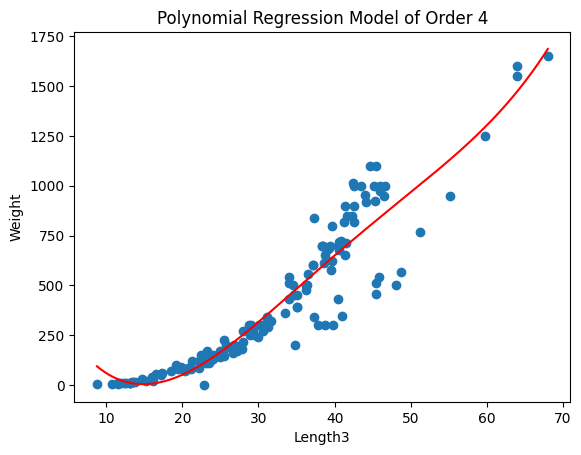

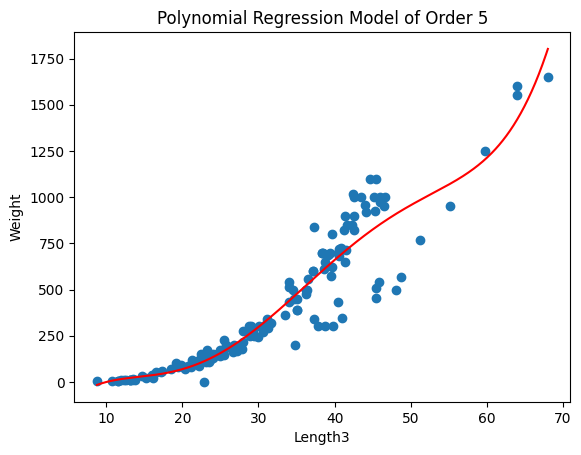

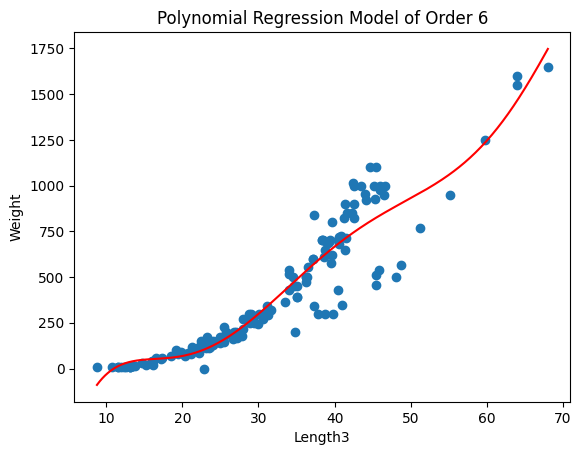

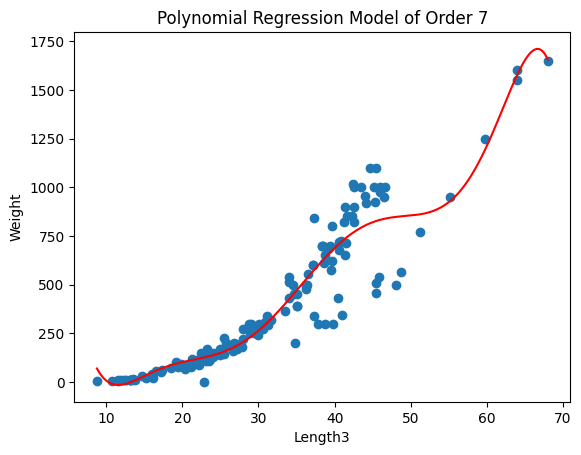

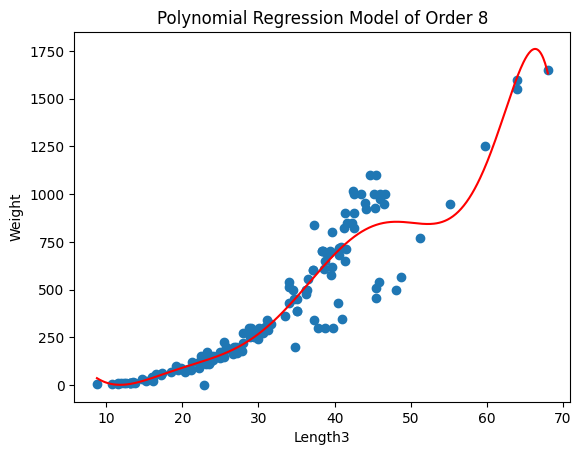

In [ ]:
mse_list = []#we want to check mean squered error for every order to make model performance

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_order, y)

    # MSE
    y_pred = model.predict(X_order)
    mse = mean_squared_error(y, y_pred)
    mse_list.append(mse)

#this code is used to make curve smooth by deviding x into equal distances
    X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    X_range_order = poly.transform(X_range)
    y_pred_range = model.predict(X_range_order)

    plt.scatter(X, y)
    plt.plot(X_range, y_pred_range, color="red")
    plt.xlabel("Length3")
    plt.ylabel("Weight")
    plt.title(f"Polynomial Regression Model of Order {order}")
    plt.show()
#this loop created for us 8 plots with Polynomial Regression Models for each order. It's goal is to illustrate how models,
#other then linear regression fit to the data.

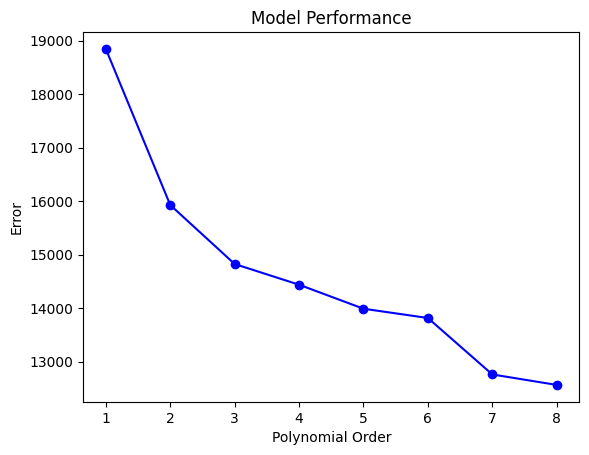

In [ ]:
plt.plot(range(1, 9), mse_list, marker='o', color='blue')
plt.xlabel("Polynomial Order")
plt.ylabel("Error")# mean squared error
plt.title("Model Performance")
plt.show()
#This plot illustrates model performance by showing how the mean squared error changes as the
#polynomial order increases.
#From this plot we could conclude that 8th polynomial has the lowest error, what's more we can observe an
#interesting plunge between 6th and 7th polynomials which could suggest that correlation between Length3 and
#weight is strongly nonlinear. Although we should be careful with high polynomial, they usualy cause overfitting.
#To check wheter they do so we will divide dataset into training and test sets in the next part of analisys.

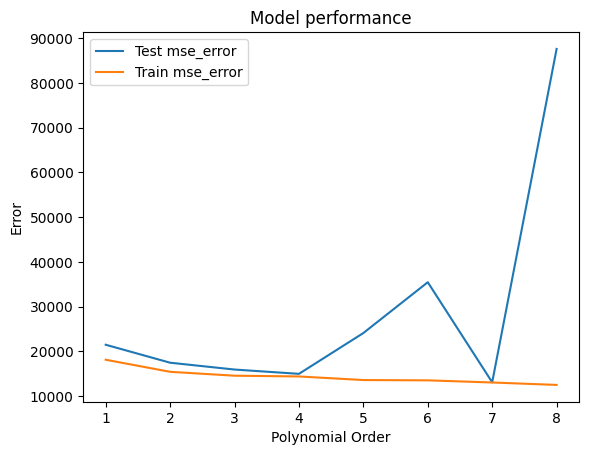

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

train_errors = []
test_errors = []

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)

    model_poly = LinearRegression()
    model_poly.fit(poly.fit_transform(X_train), y_train)

    test_error = mean_squared_error(y_test, model_poly.predict(poly.fit_transform(X_test)))
    train_error = mean_squared_error(y_train, model_poly.predict(poly.fit_transform(X_train)))
    test_errors.append(test_error)
    train_errors.append(train_error)


plt.plot(range(1, 9), test_errors, label="Test mse_error")
plt.plot(range(1, 9), train_errors, label="Train mse_error")
plt.xlabel("Polynomial Order")
plt.ylabel("Error")
plt.title("Model performance")
plt.legend()
plt.show()
#On the test set we can observe an increasing error with high-order polynomials. The error is lowest for 4th order polynomial.
#Starting from 5th order polynomial, the error increases and reaches it's maximum at 8th polynomial. However we can observe an interesting drop
#at 7th polynomial which could be accidental and could indicate that 7th polynomial fits the test set perfectly by chance. Although
#we should be causus, it's unlikely that this lucky guess will remain accurate to for all data.

In [ ]:
#Now I will focus on training a model with additional features.

X = fish_df[['Length3']].values.reshape(-1,1)
y = fish_df.Weight.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
model = LinearRegression()
_= model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean squared error equals 1: {0}".format(mean_squared_error(y_pred, y_test))) # error for using 1 feature and linear regression

X = fish_df[['Length3', 'Length2', 'Length1', 'Height', 'Width']].values.reshape(-1,5)
y = fish_df.Weight.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
model = LinearRegression()
_= model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))#error for using 5 fratures and linear regression
#we can observe that this error is higher even thought we added more features. It's caused by overfitting.


X = fish_df[['Length3', 'Length2', 'Length1', 'Height', 'Width']].values.reshape(-1,5)
y = fish_df.Weight.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("Mean squared error for Ridge regression model: {0}".format(mean_squared_error(y_pred_ridge, y_test)))#error for 5 features and
#ridge model. We can observe that this error is way smaller than the above. It's because ridghe model is resistant to overfitting.





Mean squared error equals 1: 11759.321792074037
Mean squared error equals: 46749.20163012111
Mean squared error for Ridge regression model: 3051.7538182708636


In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = fish_df[['Length3', 'Length2', 'Length1', 'Height', 'Width']].values
y = fish_df['Species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = model.score(X_test,y_test)
print(score)
#training different model (RndomForestClassifier) to check how accurate it is with predicting fish speces by it's characteristics.
#score = 0.78125 which is a medium-high accuracy. RandomForestClassifier is resistant to overfitting.


0.78125


In [46]:
#Additionaly I created a simple function for user to check fish speces based on given characteristics.
#With the model's score (accuracy) around 78%, the predictions should be moderately reliable, though there may be some cases where the model misclassifies,
#especially if certain species share similar feature values or when the input data differs a lot from data in our dataset
#(which is known as out-of-distribution data).
def predict_fish():

    length3 = float(input("Enter Length3: "))
    length2 = float(input("Enter Length2: "))
    length1 = float(input("Enter Length1: "))
    height = float(input("Enter Height: "))
    width = float(input("Enter Width: "))

    user_data = [[length3, length2, length1, height, width]]

    predicted_species = model.predict(user_data)

    print(f"Predicted Speces: {predicted_species[0]}")


predict_fish()

Enter Length3: 23
Enter Length2: 32
Enter Length1: 34
Enter Height: 23
Enter Width: 34
Predicted Speces: Bream
